# NLP & Classification Group Project

### Project Title: News Article Category Predictions
#### Done By: Amogelang Mogwane, Chris Phillip, Moosa Molibeli & Tiisetso Gabaza

© ExploreAI 2024

----

![NewsPaper](newspaper1.jpg)

<a id="cont"></a>
## Table of Contents

<a href=#one>1. Background Context</a>

<a href=#two>2. Importing Packages</a>

<a href=#three>3. Data Collection and Description</a>

<a href=#four>4. Loading Data </a>

<a href=#five>5. Data Cleaning and PreProcessing</a>

<a href=#six>6. Exploratory Data Analysis (EDA)</a>

<a href=#seven>7. Modeling</a>

<a href=#eight>8. Evaluation and Validation</a>

<a href=#nine>9. Final Model</a>

<a href=#ten>10. Streamlit Deployment</a>

<a href=#eleven>11. Conclusion and Future Work</a>

<a href=#twelve>12. References</a>

---
<a id="one"></a>
## Background Context
<a href=#cont>Back to Table of Contents</a>

From the inception of printed newspapers, every article has been assigned to a specific section. While many aspects of the newspaper industry have evolved—ranging from ink and paper types to distribution methods—the practice of categorizing news has persisted across generations, extending into digital formats. Newspaper articles cover a broad spectrum of topics, including politics, sports, and entertainment. Historically, categorization was primarily a manual process, but advancements in technology now allow for automated classification with minimal effort.

This project aims to design and develop an application that predicts the categories of news articles intended for publication. By utilizing classification algorithms, we will analyze the content of articles to determine their respective genres. The proposed algorithm will not only classify existing topics but also adapt to new topics as they emerge in the content. While the algorithm is extendable to multiple languages, this paper will primarily focus on English.

In the realm of news article classification, multi-label text classification poses a significant challenge. Our objective is to assign one or more category labels to each article. For each category, classifiers will provide binary responses—either "yes" or "no"—indicating whether a specific category applies to the given test data. This approach utilizes binary classifiers, and we will implement several standard algorithms, including K-Nearest Neighbours, Support Vector Machines, and Logistic Regression, which are commonly used for binary classification. We will evaluate these three approaches and select the best model based on predetermined parameters for predicting news categories.

A robust category classification algorithm for news articles must achieve high precision while remaining easily updatable. Given the continuous evolution of news topics and events, the ability to seamlessly add new categories to the classifier is essential.

![News Articles](newspaper2.jpg)

---
<a id="two"></a>
## Importing Packages
<a href=#cont>Back to Table of Contents</a>

**Please Note:**
*The below are all the libraries I believe I will need for this project. This list will be adjusted as needed throughout the project*

In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt 
import seaborn as sns
import nltk
import re
from nltk.corpus import stopwords

from sklearn.feature_extraction.text import TfidfVectorizer

from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTEENN 
from sklearn.model_selection import train_test_split

from wordcloud import WordCloud

from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

from sklearn.model_selection import cross_val_score

from sklearn.model_selection import GridSearchCV

import streamlit as st

import joblib 

import warnings
warnings.filterwarnings('ignore')

In [39]:
# please run this code if you do not have wordcloud installed in your environment
#!pip install wordcloud

In [40]:
# please run this code if you do not have imbalanced-learn installed in your environment
#pip install imbalanced-learn

In [41]:
# please run this code if you do not have xgboost installed in your environment
#!pip install xgboost

In [42]:
# please run this code if you do not have xgboost installed in your environment
#!pip install streamlit

---
<a id="three"></a>
## Data Collection and Description
<a href=#cont>Back to Table of Contents</a>

This project utilizes a news dataset containing articles categorized into five distinct groups: Sports, Business, Entertainment, Education, and Technology. The dataset is randomly partitioned into training and testing sets, with the challenge of developing a classification model to predict the category of each news article.

The training dataset comprises 5,520 records across five columns, while the testing dataset consists of 2,000 observations with the same column structure. The columns included in the dataset are: 'index', 'headlines', 'description', 'content', 'url', and 'category'. The target variable for prediction is the 'category' column. Other columns will either be discarded (e.g., the 'url' column) or combined to create a single content column for the articles.

---
<a id="four"></a>
## Loading Data
<a href=#cont>Back to Table of Contents</a>

In [3]:
# loading our training and our testing data sets
train_df = pd.read_csv("train.csv")
test_df = pd.read_csv("test.csv")

In [4]:
# getting a sense of the training data from the first 5 observations
train_df.head()

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


In [5]:
# understanding the structure of the training dataset
train_df.shape

(5520, 5)

In [6]:
# understanding the structure of the testing dataset
test_df.shape

(2000, 5)

---
<a id="five"></a>
## Data Cleaning and PreProcessing
<a href=#cont>Back to Table of Contents</a>

Data cleaning is an essential first step in any data-driven project, ensuring the dataset is accurate, consistent, and ready for analysis. For our news article classification project, this involves several processes to improve data quality.

We will start by creating a copy of the training dataset. This way, any major changes can be made while preserving the original for reference.
All the steps we do to our training dataset, we will also apply to our testing dataset

In [7]:
# creating a copy of the training dataframe
train_df_copy = train_df.copy()
test_df_copy = test_df.copy()

Next, we'll address any missing or incomplete data. Missing values can distort results and lead to inaccurate conclusions, so it's crucial to identify and handle these gaps through imputation, removal, or replacement.

In [8]:
# checking for missing values
train_df_copy.isnull().sum()

headlines      0
description    0
content        0
url            0
category       0
dtype: int64

In [9]:
# checking for missing values
test_df_copy.isnull().sum()

headlines      0
description    0
content        0
url            0
category       0
dtype: int64

Since there are no missing values, we can confidently move on to the next phase of the project.

Next, we will address any duplicate records to avoid bias in model training. Ensuring each article is unique is essential for accurately training the classification model.

In [10]:
# dropping any duplicates that might exist
train_df_copy.drop_duplicates(inplace=True)

train_df_copy.shape

(5520, 5)

In [11]:
# dropping any duplicates that might exist
test_df_copy.drop_duplicates(inplace=True)

test_df_copy.shape

(2000, 5)

The structure of the training dataset remains intact, confirming there are no duplicates. We can proceed with confidence, knowing our dataset is unbiased for modeling.

Next, we will remove the URL column, as it does not add value to our news category predictions and is considered redundant.

In [12]:
# removing redundant url column 
train_df_copy.drop(columns="url",inplace=True)
test_df_copy.drop(columns="url",inplace=True)

train_df_copy.head()

,headlines,description,content,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,business


Lastly, we will standardize the text data by converting everything to lowercase for consistency, removing punctuation, eliminating stop words that add little meaning, and lemmatizing the dataset. These steps will streamline the data, making it easier for classification algorithms to process effectively. Lemmatization will reduce words to their base forms, enhancing classification across all observations.

We will define a function to perform these final cleanup steps on our content column.

In [13]:
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from nltk.tokenize import word_tokenize

# text cleaning 
def clean_text(text):
    
    text = re.sub(r'\W', ' ', text)  # removing special characters
    text = text.lower()  # lowercasing the text
    tokens = word_tokenize(text)  # tokenizing the text
    
    # removing stop words and lemmatizing to reduce the words to base words
    lemmatizer = WordNetLemmatizer()  # initialization
    stop_words = set(stopwords.words('english'))
    cleaned_tokens = [
        lemmatizer.lemmatize(token) for token in tokens if token not in stop_words
    ]

    # joining tokens back to string
    return ' '.join(cleaned_tokens)

columns_to_clean = ['headlines', 'description', 'content']

# applying the clean_text function to the relevant columns in the train and test datasets
train_df_copy[columns_to_clean] = train_df_copy[columns_to_clean].applymap(clean_text)
test_df_copy[columns_to_clean] = test_df_copy[columns_to_clean].applymap(clean_text)

In [14]:
train_df_copy.head()

,headlines,description,content,category
0,rbi revise definition politically exposed pers...,central bank also asked chairperson chief exec...,reserve bank india rbi changed definition poli...,business
1,ndtv q2 net profit fall 57 4 r 5 55 crore impa...,ndtv consolidated revenue operation r 95 55 cr...,broadcaster new delhi television ltd monday re...,business
2,akasa air well capitalised grow much faster ce...,initial share sale open public subscription ju...,homegrown server maker netweb technology india...,business
3,india current account deficit decline sharply ...,current account deficit cad 3 8 per cent gdp u...,india current account deficit declined sharply...,business
4,state borrowing cost soar 7 68 highest far fiscal,price shot reflecting overall higher risk aver...,state forced pay nose weekly auction debt tues...,business


By applying these data cleaning techniques, we aim to build a high-quality dataset that improves the reliability of our classification model, ultimately leading to more accurate predictions of news categories.

---
<a id="six"></a>
## Exploratory Data Analysis (EDA)
<a href=#cont>Back to Table of Contents</a>

Exploratory Data Analysis (EDA) is a crucial step in our news classification project, allowing us to better understand the dataset's characteristics and distributions. In this phase, we will focus firstly on visualizing the distribution of news categories to identify any imbalances. This initial visualization will provide insights into how the categories are spread across the dataset.

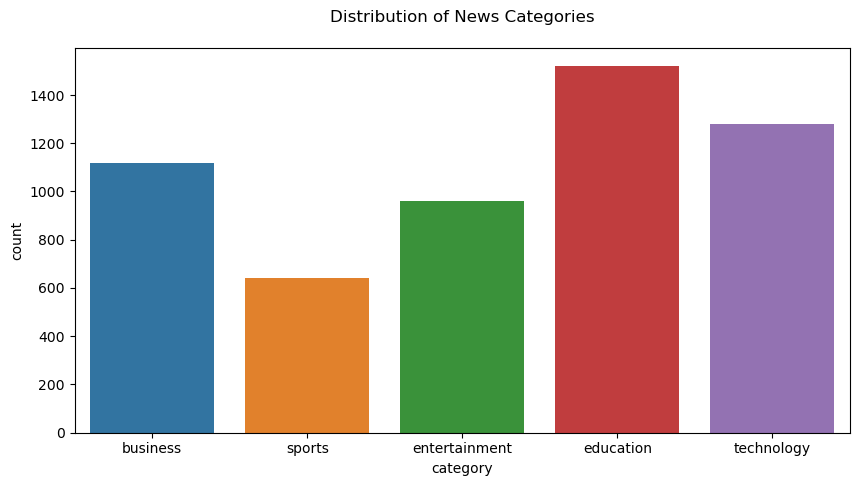

In [16]:
# getting the distribution of the categories
plt.figure(figsize=(10, 5))
sns.countplot(data=train_df_copy, x='category')
plt.title('Distribution of News Categories\n')
plt.show()

From the visualisation, we can clearly note some imbalances in the spread of our news categories. This can lead to a biased models that perform well on majority classes but poorly on minority classes. A balanced dataset generally helps the model generalize better, leading to improved performance in real-world applications where class distributions may vary.

Let us now numerically verify the counts for each category. Understanding the extent of this imbalance is essential for implementing effective solutions.

In [17]:
# verifying the count of each category
train_df_copy['category'].value_counts()

category
education        1520
technology       1280
business         1120
entertainment     960
sports            640
Name: count, dtype: int64

The above further verifies the imbalance of the categories in our training dataset. 

It might be necessary to use Synthetic Data Generation which uses techniques like SMOTE (Synthetic Minority Over-sampling Technique) to create synthetic examples for minority classes.

The counts are not extremely skewed, but Category 0 has significantly fewer instances than the others. The difference between the largest (Category 3) and the smallest (Category 0) is 880 instances. While the other categories are relatively balanced, Category 0 might be at risk of being underrepresented, which could lead to poor model performance.

Due to the underrepresentation of Category 0, we will apply a SMOTE technique

In [18]:
from imblearn.over_sampling import SMOTE
from sklearn.feature_extraction.text import TfidfVectorizer
from imblearn.combine import SMOTEENN 
from sklearn.model_selection import train_test_split

# preparing our features and target from the training and testing datasets
X_train = train_df_copy[['headlines', 'description', 'content']]  # feature train column
y_train = train_df_copy['category']  # target train column
X_test = test_df_copy[['headlines', 'description', 'content']]  # feature column for testing
y_test = test_df_copy['category']  # target column for testing

# splitting the training dataset into train and test data using a 20/80 split
X_train_split, X_val_split, y_train_split, y_val_split = train_test_split(
    X_train,  # Features
    y_train,  # Target
    test_size=0.2,  # 20% for validation, 80% for training
    random_state=42,  # For reproducibility
    stratify=train_df_copy['category']  # Ensures the split maintains the class distribution
)

# vectorising the training data
vectorizer = TfidfVectorizer() # this captures bi & tri-grams
# fitting and transforming the training data
X_train_vec = vectorizer.fit_transform(X_train_split['headlines'] + ' ' + X_train_split['description'] + ' ' + X_train_split['content'])

# transforming the validation data 
X_val_vec = vectorizer.transform(X_val_split['headlines'] + ' ' + X_val_split['description'] + ' ' + X_val_split['content'])

# applying SMOTE to the training data
#smote = SMOTE(random_state=42)
#X_resampled, y_resampled = smote.fit_resample(X_train_vec, y_train)

#combining SMOTE with random sampling on training data
#smote_enn = SMOTEENN(random_state=42)
#X_resampled, y_resampled = smote_enn.fit_resample(X_train_vec, y_train)

# Check the new class distribution
#print(pd.Series(y_resampled).value_counts())

Vectorisation is a crucial step in preparing text data for machine learning models. In machine learning, models require rumeric input, so the vectorisation transform the text data into a numerical format to be processed. Vectorisation methods, like TF-IDF (Term Frequency-Inverse Document Frequency) we used above, converts text into vectors that represent the presence or frequency of words or terms. This allows any models to analyze patterns based on these features. The TF-IDF technique can also help in reducing the number of dimensions by focusing on the most informative terms, which can improve model performance and training speed.

We will now store the vectorised model. This will ensure consistency when applying our Streamlit app. When we vectorised our data, we created a specific mapping of text features. Saving this model will ensure we continue to use the same instance in our Streamlit app when we apply it to our project. 

In [19]:
# saving vectoriser to be used for streamlit app later
import joblib  # For loading the model
joblib.dump(vectorizer, 'vectorizer.pkl')

['vectorizer.pkl']

Furthermore, we will create word clouds for each category to visualize the most frequently occurring terms. By defining a function to generate these word clouds, we can gain additional insights into the key topics and themes present within each category.

In [20]:
# defining a function to generate word clouds for each category
from wordcloud import WordCloud

def generate_word_clouds(df, category_column='Category', text_column='Cleaned_Content'):
    categories = df[category_column].unique()  # getting unique categories

    # ensureing there are no more than 4 categories
    if len(categories) > 5:
        raise ValueError("This function supports up to 4 categories only.")
        
    plt.figure(figsize=(15, 10))  # setting figure size

    for i, category in enumerate(categories):
        plt.subplot(3, 2, i + 1)  # creating a subplot for each category
        # combining all text for the specific category
        text = ' '.join(df[df[category_column] == category][text_column])
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Display the word cloud
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Turn off axis
        plt.title(category)  # Set the title to the category

    plt.tight_layout()  # Adjust subplots to fit into the figure area.
    plt.show()

In [21]:
from wordcloud import WordCloud

def generate_word_clouds(df, category_column='category', text_columns=['headlines', 'description', 'content']):
    categories = df[category_column].unique()  # Getting unique categories

    # Ensuring there are no more than 4 categories
    if len(categories) > 5:
        raise ValueError("This function supports up to 5 categories only.")
    
    plt.figure(figsize=(15, 10))  # Setting figure size
    
    for i, category in enumerate(categories):
        plt.subplot(3, 2, i + 1)  # Creating a subplot for each category (adjust grid size)
        
        # Combine text from all specified columns for the current category
        text = ' '.join(df[df[category_column] == category][text_columns].apply(lambda x: ' '.join(x), axis=1))
        
        # Generate the word cloud for the combined text
        wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
        
        # Display the word cloud
        plt.imshow(wordcloud, interpolation='bilinear')
        plt.axis('off')  # Turn off axis
        plt.title(category)  # Set the title to the category

    plt.tight_layout()  # Adjust subplots to fit into the figure area
    plt.show()

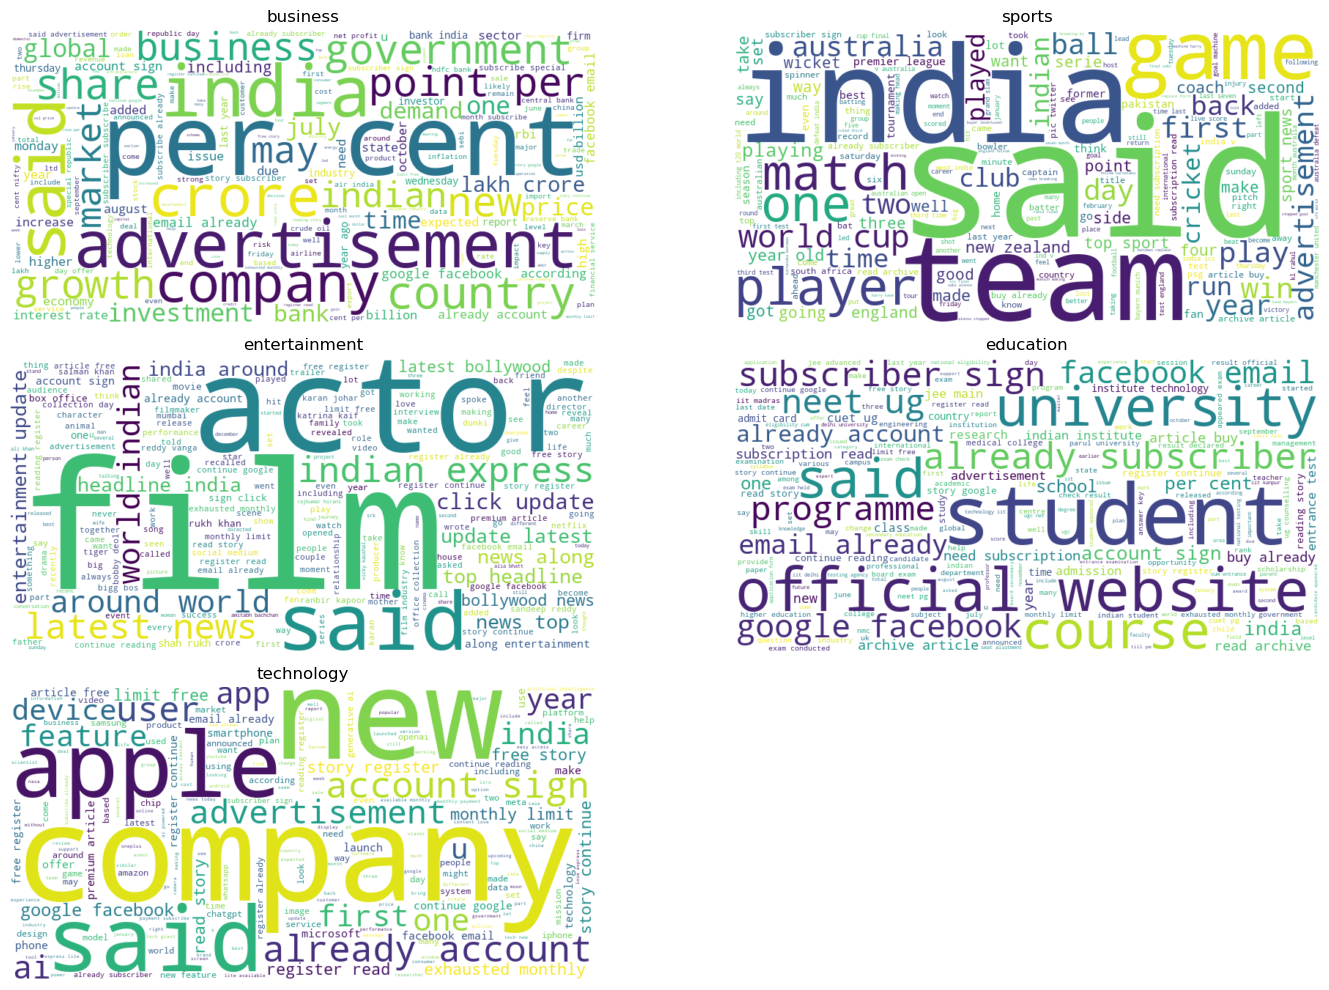

In [22]:
generate_word_clouds(train_df_copy)

The EDA phase has provided a comprehensive overview of our dataset, helping us identify class imbalances and the key characteristics of each news category. By visualizing category distributions, verifying counts, and generating word clouds, we have laid a solid foundation for subsequent modeling efforts, ultimately enhancing the performance of our classification model.

----
<a id="seven"></a>
## Modeling
<a href=#cont>Back to Table of Contents</a>

In [23]:
from sklearn.preprocessing import LabelEncoder

# Instantiate the LabelEncoder
label_encoder = LabelEncoder()

# Fit and transform the target labels to numeric values
y_train_split_encoded = label_encoder.fit_transform(y_train_split)

In [24]:
# training multiple classification models

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
import xgboost as xgb

# instantiating classifiers
models = {
    'Logistic Regression': LogisticRegression(class_weight='balanced'),
    'Naive Bayes': MultinomialNB(),
    'SVM': SVC(class_weight='balanced'),
    'Random Forest': RandomForestClassifier(class_weight='balanced'),
    'XGBoost': xgb.XGBClassifier(class_weight='balanced')
}

# Train models and store them
model_results = {}
for name, model in models.items():
    model.fit(X_train_vec, y_train_split_encoded)
    model_results[name] = model

In [25]:
# model evaluation using cross-validation
from sklearn.model_selection import cross_val_score

# Perform cross-validation on each model
cv_results = {}
for name, model in model_results.items():
    cv_scores = cross_val_score(model, X_train_vec, y_train_split_encoded, cv=5, scoring='accuracy')
    cv_results[name] = cv_scores.mean()

# Display cross-validation results
for name, score in cv_results.items():
    print(f'{name}: Cross-validation Accuracy: {score:.4f}')


Logistic Regression: Cross-validation Accuracy: 0.9789
Naive Bayes: Cross-validation Accuracy: 0.9644
SVM: Cross-validation Accuracy: 0.9769
Random Forest: Cross-validation Accuracy: 0.9586
XGBoost: Cross-validation Accuracy: 0.9633


In [26]:
# hyperparameter tuning using GridSearchCV

from sklearn.model_selection import GridSearchCV

param_grids = {
    'Logistic Regression': {
        'C': [0.1, 1, 10]  # Regularization strength
    },
    'SVM': {
        'C': [0.1, 1, 10],  # Regularization parameter
        'kernel': ['linear', 'rbf'],  # Linear or Radial basis function kernel
        'gamma': [1, 0.1, 0.01, 0.001],  # Kernel coefficient for 'rbf' (if kernel='rbf')
    },
    'Naive Bayes': {
        'alpha': [0.1, 0.5, 1.0, 2.0]  # Smoothing parameter (Laplace smoothing)
    }
}

# Perform GridSearchCV for each model
best_models = {}
for name, model in model_results.items():
    if name in param_grids:
        grid_search = GridSearchCV(model, param_grids[name], cv=5, scoring='accuracy', n_jobs=-1)
        grid_search.fit(X_train_vec, y_train_split_encoded)
        best_models[name] = grid_search.best_estimator_
        print(f"Best Parameters for {name}: {grid_search.best_params_}")

Best Parameters for Logistic Regression: {'C': 10}
Best Parameters for Naive Bayes: {'alpha': 0.1}
Best Parameters for SVM: {'C': 10, 'gamma': 1, 'kernel': 'linear'}


---
<a id="eight"></a>
## Evaluation and Validation
<a href=#cont>Back to Table of Contents</a>

In [27]:
# Fit and transform the target labels to numeric values
y_val_split_encoded = label_encoder.fit_transform(y_val_split)

In [28]:
# evaluating the best model
from sklearn.metrics import classification_report, accuracy_score

# Evaluate each best model on the test set
for name, model in best_models.items():
    y_pred = model.predict(X_val_vec)
    print(f'Classification Report for {name}:')
    print(classification_report(y_val_split_encoded, y_pred))
    print(f'Accuracy: {accuracy_score(y_val_split_encoded, y_pred):.4f}')


Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97       224
           1       1.00      0.99      0.99       304
           2       1.00      1.00      1.00       192
           3       0.98      0.98      0.98       128
           4       0.98      0.98      0.98       256

    accuracy                           0.99      1104
   macro avg       0.99      0.99      0.99      1104
weighted avg       0.99      0.99      0.99      1104

Accuracy: 0.9864
Classification Report for Naive Bayes:
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       224
           1       1.00      1.00      1.00       304
           2       0.99      1.00      0.99       192
           3       0.98      0.97      0.98       128
           4       0.98      0.98      0.98       256

    accuracy                           0.99      1104
   macro avg       0.99     

 Accuracy Comparison:
Logistic Regression: Accuracy = 0.9864

Naive Bayes: Accuracy = 0.9864

SVM: Accuracy = 0.9846

Logistic Regression and Naive Bayes have the highest accuracy (both 0.9864), while SVM has slightly lower accuracy (0.9846). These differences in accuracy are small, but Logistic Regression and Naive Bayes are tied for the best.

2. Macro and Weighted Averages:
Logistic Regression:
Macro avg (unweighted average of precision, recall, and f1-score for each class): 0.99
Weighted avg (averaged by class support): 0.99
Naive Bayes:
Macro avg: 0.99
Weighted avg: 0.99
SVM:
Macro avg: 0.99
Weighted avg: 0.98
Both Logistic Regression and Naive Bayes have higher weighted average f1-scores (0.99 vs 0.98 for SVM), which means they handle class imbalances better and perform consistently across all classes.

3. Precision, Recall, and F1-Score for each class:
Logistic Regression and Naive Bayes perform almost identically across all classes, with very high precision, recall, and f1-scores for each class.

SVM: While SVM is strong overall, it has slightly lower recall and precision for class 0 (label 'business') and class 4 (label 'technology'). This suggests that SVM might miss or misclassify a few instances of these categories compared to Logistic Regression or Naive Bayes.

Key Insights:
Logistic Regression and Naive Bayes have identical results, both with a slight edge over SVM in terms of handling all classes equally well. Given that these models are tied in performance metrics, either one of them could be considered the best.

Logistic Regression is often preferred when you are dealing with text data in multi-class classification problems. It’s fast and provides well-calibrated probabilities. If interpretability is important, Logistic Regression also tends to provide clearer insights into the importance of each feature.

Naive Bayes tends to be faster during training and works well with word frequency data (like text data). However, it makes strong assumptions about independence between features, which may not always hold true in more complex datasets.

Why Logistic Regression (or Naive Bayes) is Best:
Accuracy is slightly better than SVM.
Macro and Weighted averages indicate balanced performance across classes, with no significant drop in performance for any class.
Performance across all classes is consistent, with high precision and recall for each class.
Final Conclusion:
Since Logistic Regression and Naive Bayes are tied in terms of accuracy and other performance metrics, Logistic Regression might be the better choice due to its flexibility, better generalization, and interpretability in many cases. However, if speed is critical or if the model needs to scale quickly with large amounts of data, Naive Bayes might be a better option due to its simplicity and faster training time.

Both models will provide excellent performance, but Logistic Regression is likely the preferred choice in this case due to its overall balance between accuracy and interpretability.

---
<a id="nine"></a>
## Final Model
<a href=#cont>Back to Table of Contents</a>

In [29]:
# 1. Preprocess and vectorize the training and test data
vectorizer = TfidfVectorizer()  # Example: Bi-grams and Tri-grams

# Fit and transform the training data
X_train_vec = vectorizer.fit_transform(train_df_copy['headlines'] + ' ' + train_df_copy['description'] + ' ' + train_df_copy['content'])

# Transform the test data using the same vectorizer (do NOT fit it again)
X_test_vec = vectorizer.transform(test_df_copy['headlines'] + ' ' + test_df_copy['description'] + ' ' + test_df_copy['content'])

# 2. Encode the target labels for both training and test sets
label_encoder = LabelEncoder()

# Fit and transform the training target labels
y_train_encoded = label_encoder.fit_transform(train_df_copy['category'])

# Transform the test target labels (use the same encoder, do not fit again)
y_test_encoded = label_encoder.transform(test_df_copy['category'])

# 3. Train Logistic Regression on the entire training dataset
logreg = LogisticRegression(class_weight='balanced')  # Use class_weight='balanced' if you have class imbalance
logreg.fit(X_train_vec, y_train_encoded)

# 4. Make predictions on the test dataset
y_pred = logreg.predict(X_test_vec)

# 5. Optionally, convert the numeric predictions back to original labels
y_pred_original = label_encoder.inverse_transform(y_pred)

# 6. Evaluate model performance on the test set
print(classification_report(y_test_encoded, y_pred))

              precision    recall  f1-score   support

           0       0.97      0.96      0.97       400
           1       1.00      0.98      0.99       400
           2       0.99      0.99      0.99       400
           3       0.99      0.99      0.99       400
           4       0.94      0.97      0.96       400

    accuracy                           0.98      2000
   macro avg       0.98      0.98      0.98      2000
weighted avg       0.98      0.98      0.98      2000



---
<a id="ten"></a>
## Streamlit Deployment
<a href=#cont>Back to Table of Contents</a>

In [30]:
# saving the model, vectorizer, and label encoder using joblib
joblib.dump(logreg, 'final_logreg_model.pkl')  # Save the trained Logistic Regression model
joblib.dump(vectorizer, 'final_vectorizer.pkl')  # Save the fitted TfidfVectorizer
joblib.dump(label_encoder, 'final_label_encoder.pkl')  # Save the LabelEncoder

print("Model, Vectorizer, and Label Encoder saved successfully!")

Model, Vectorizer, and Label Encoder saved successfully!


In [31]:
# loading the saved model, vectorizer, and label encoder
logreg = joblib.load('final_logreg_model.pkl')
vectorizer = joblib.load('final_vectorizer.pkl')
label_encoder = joblib.load('final_label_encoder.pkl')

# Example text to classify
text = "Example news article content here."

# Transform the text using the same vectorizer
text_vectorized = vectorizer.transform([text])

# Predict the category using the loaded model
y_pred = logreg.predict(text_vectorized)

# Convert the numeric prediction back to the original label
y_pred_original = label_encoder.inverse_transform(y_pred)

print(f"Predicted Category: {y_pred_original[0]}")

Predicted Category: technology


In [32]:
# running the streamlit app code

import streamlit as st

# loading the saved model and vectorizer
model = joblib.load('final_logreg_model.pkl')
vectorizer = joblib.load('final_vectorizer.pkl')

# Function to predict the category
def predict_category(text):
    # Transform the input text using the same vectorizer
    text_vectorized = vectorizer.transform([text])
    
    # Get the prediction from the model
    prediction = model.predict(text_vectorized)
    
    # Return the predicted class label
    return prediction[0]

# Streamlit app layout
st.title('News Classification Application')
st.subheader('Enter a news article to classify its category')

# Input text box
article_text = st.text_area('Enter article text:', height=300)

# When the user clicks the classify button
if st.button('Classify'):
    if article_text.strip() != "":
        category = predict_category(article_text)
        st.write(f'Predicted Category: {category}')
    else:
        st.write("Please enter some text to classify.")

2024-10-18 16:22:40.789 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-18 16:22:40.846 
  command:

    streamlit run C:\Users\Moosa Molibeli\anaconda3\Lib\site-packages\ipykernel_launcher.py [ARGUMENTS]
2024-10-18 16:22:40.846 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-18 16:22:40.846 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-18 16:22:40.846 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-18 16:22:40.846 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-18 16:22:40.846 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2024-10-18 16:22:40.859 Thread 'MainTh

In [33]:
app_code = """
import streamlit as st
import joblib
import numpy as np

# Load the saved model, vectorizer, and label encoder
logreg = joblib.load('final_logreg_model.pkl')
vectorizer = joblib.load('final_vectorizer.pkl')
label_encoder = joblib.load('final_label_encoder.pkl')

# Function to predict the category
def predict_category(text):
    # Transform the input text using the same vectorizer
    text_vectorized = vectorizer.transform([text])
    
    # Get the prediction from the model
    prediction = logreg.predict(text_vectorized)
    
    # Return the predicted class label
    return label_encoder.inverse_transform(prediction)[0]

# Streamlit app layout
st.title('News Classification Application')
st.subheader('Enter a news article to classify its category')

# Input text box
article_text = st.text_area('Enter article text:', height=300)

# When the user clicks the classify button
if st.button('Classify'):
    if article_text.strip() != "":
        category = predict_category(article_text)
        st.write(f'Predicted Category: {category}')
    else:
        st.write("Please enter some text to classify.")
"""

# Save the code to a file named 'app.py'
with open("app.py", "w") as f:
    f.write(app_code)

print("app.py file has been saved successfully!")

app.py file has been saved successfully!


---
<a id="eleven"></a>
## Conclusion and Future Work
<a href=#cont>Back to Table of Contents</a>

---
<a id="twelve"></a>
## References
<a href=#cont>Back to Table of Contents</a>

[1] Rao, S., Sudarshan, K. and Abhishek (2020) 'News Article Category Predictor', Department of Computer Science and Engineering, Srinivas Institute of Technology, Valachil, India.

[2] Tong, S. and Koller, D. (2000) 'Support vector machine active learning with applications to text classification', in Langley, P. (ed.) Proceedings ICML-00, 17th International Conference on Machine Learning, pp. 999–1006.

[3] McCallum, A. and Nigam, K. (1998) 'A comparison of event models for naive Bayes text classification', in AAAI/ICML-98 Workshop on Learning for Text Categorization.